# Auto Claims Data Load

## Install required packages

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install dask
# !pip install matplotlib
# !pip install statsmodels
# !pip install seaborn
# !pip install sklearn

## Load Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

random.seed(81422)

%matplotlib inline

## Set up working directories

In [3]:
cwd = os.getcwd()

inputdir = "C:\\devl\\AutoClaims\\data"
outputdir = "C:\\devl\\AutoClaims\\output"

## Read in Data

In [4]:
dat = pd.read_csv(inputdir + "\\train_set.csv", na_values = '?') #, nrows = 10000)

In [5]:
dat.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,NaN,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,NaN,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [6]:
# Check data shape and number of unique households
print(dat.shape[0], "rows", "\n", \
      dat.shape[1], "columns", "\n", \
      dat['Household_ID'].nunique(), "unique households")


13184290 rows 
 35 columns 
 4309042 unique households


In [7]:
print(dat.dtypes)

Row_ID              int64
Household_ID        int64
Vehicle             int64
Calendar_Year       int64
Model_Year          int64
Blind_Make         object
Blind_Model        object
Blind_Submodel     object
Cat1               object
Cat2               object
Cat3               object
Cat4               object
Cat5               object
Cat6               object
Cat7               object
Cat8               object
Cat9               object
Cat10              object
Cat11              object
Cat12              object
OrdCat            float64
Var1              float64
Var2              float64
Var3              float64
Var4              float64
Var5              float64
Var6              float64
Var7              float64
Var8              float64
NVCat              object
NVVar1            float64
NVVar2            float64
NVVar3            float64
NVVar4            float64
Claim_Amount      float64
dtype: object


In [8]:
# Cast categorical column types as string
cols_categorical = ['Blind_Make', 'Blind_Model', 'Blind_Submodel']
cols_categorical = cols_categorical + [col for col in dat.columns if 'Cat' in col]

print(cols_categorical)

#Deal with Missing Values - here just treat as another level
for col in cols_categorical:
    dat[col].fillna('missing', inplace = True)
    
dat.head()

['Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat', 'NVCat']


,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,missing,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,missing,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [9]:
for col in cols_categorical:
    dat[col] = dat[col].astype(str)

In [10]:
dat.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,missing,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,missing,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [11]:
#dat.dtypes

## Train/test splits

### Generate folds that:
    1. Stratify on claim / no claim
    2. Keep households and household vehicles within-folds to prevent data leakage

In [12]:
dat['Claim'] = dat['Claim_Amount'] > 0
dat['Claim'].mean()

0.007251433334673312

In [13]:
# extract unique HHIDs, reserve 1 fold for OOS testing, split rest into 5 folds
HHIDs = dat['Household_ID'].copy().unique()

random.shuffle(HHIDs)

n_folds = 6 #5 for CV, 1 for final holdout
folds = np.repeat(np.arange(1, n_folds + 1), len(HHIDs)//n_folds)

folds = np.append(folds, np.repeat(n_folds, len(HHIDs) - len(folds)))

fold_map = {HHIDs[i]: folds[i] for i in range(len(HHIDs))}
dat['FOLD'] = dat['Household_ID'].map(fold_map)
dat.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,Claim,FOLD
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0,False,4
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0,False,2
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,missing,...,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,False,1
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,missing,...,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,False,1
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,False,1


In [14]:
# Check claim occurrence by fold - the randomization has done a decent job
# of distributing claims without explicit stratification
dat.groupby('FOLD')['Claim'].mean()

FOLD
1    0.007244
2    0.007289
3    0.007204
4    0.007239
5    0.007211
6    0.007323
Name: Claim, dtype: float64

In [15]:
# Set testing data aside
train_dat = dat[dat['FOLD'] < 6].copy()
test_dat = dat[dat['FOLD'] >= 6].copy()

print(train_dat.shape, test_dat.shape)

(10985706, 37) (2198584, 37)


## EDA

### Categorical Vars

In [16]:
# Check for thin counts
# OrdCat would need to be collapsed into bins forcing monotonicity to be treated as numeric
# Blind_Make, Blind_Model, Blind_Submodel require target encoding
for col in cols_categorical:
    print(train_dat.groupby([col])[col].count())

Blind_Make
A              15
AB              4
AC          14628
AD            439
AE            198
            ...  
W          459750
X          672607
Y          706137
Z           34065
missing      6973
Name: Blind_Make, Length: 75, dtype: int64
Blind_Model
A.2          13
A.3           2
AB.2          4
AC.1       2193
AC.2       2193
           ... 
Z.43       1572
Z.45        426
Z.5         888
Z.8        1218
missing    6973
Name: Blind_Model, Length: 1297, dtype: int64
Blind_Submodel
A.2.0        13
A.3.0         2
AB.2.0        1
AB.2.1        3
AC.1.1     1651
           ... 
Z.43.0     1572
Z.45.0      426
Z.5.0       888
Z.8.0      1218
missing    6973
Name: Blind_Submodel, Length: 2724, dtype: int64
Cat1
A           640265
B          3349311
C           334622
D          2072523
E           232700
F          1087237
G           652125
H           188530
I          2212065
J           194838
missing      21490
Name: Cat1, dtype: int64
Cat2
A          1824756
B          

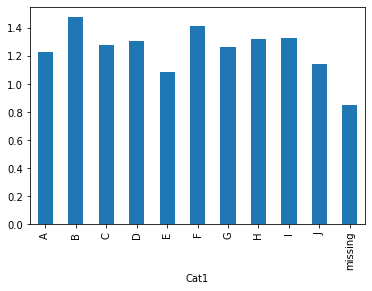

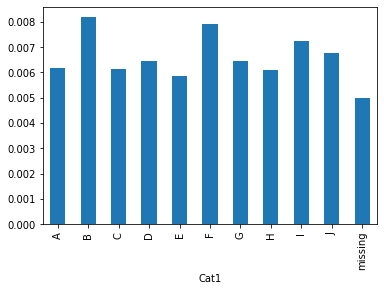

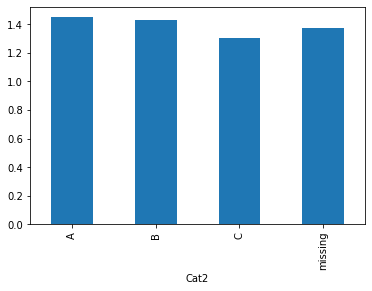

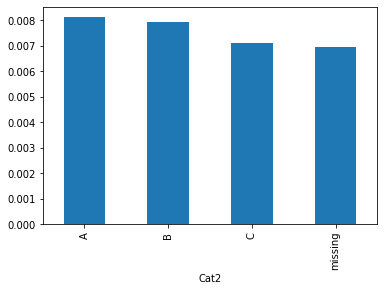

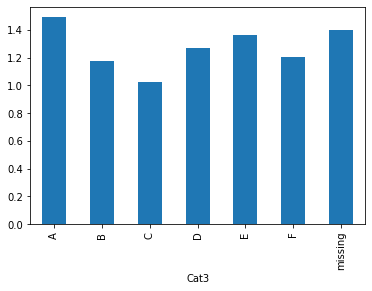

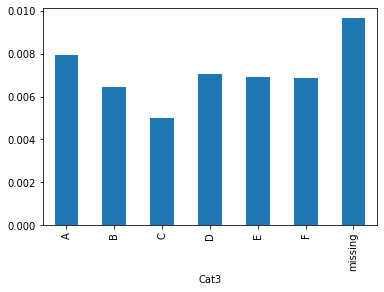

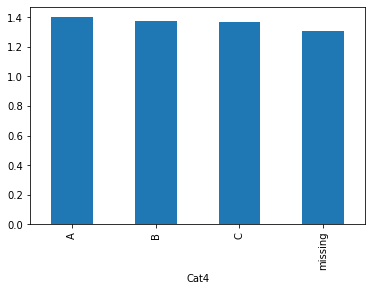

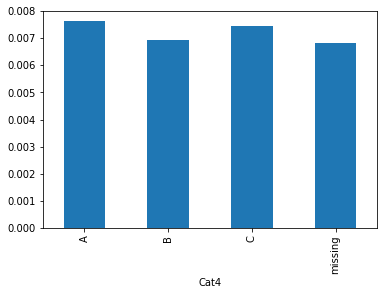

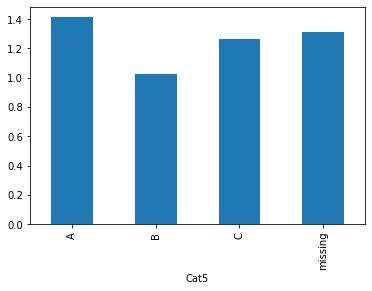

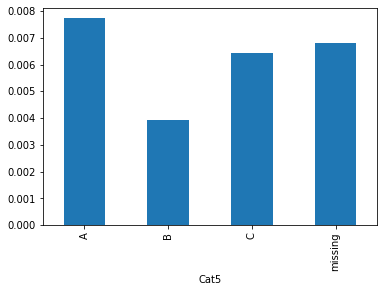

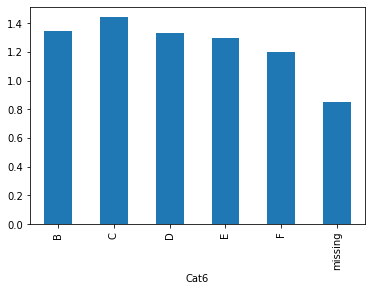

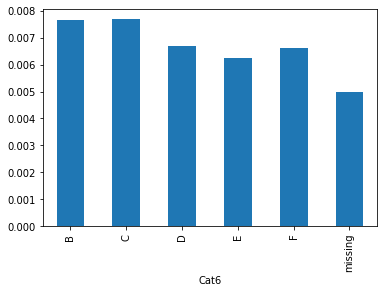

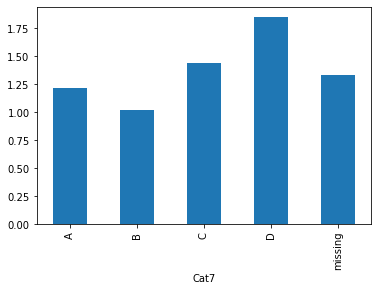

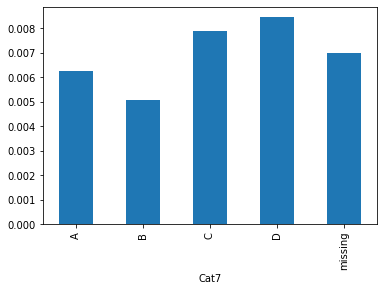

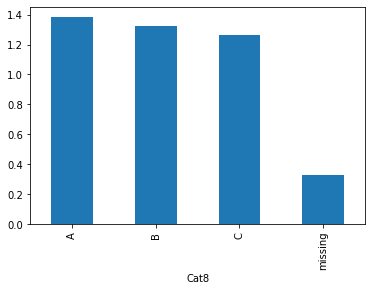

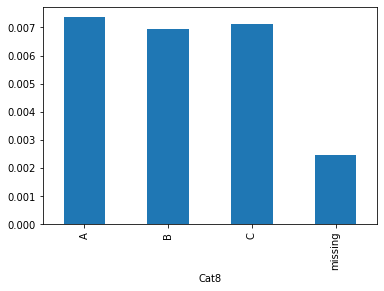

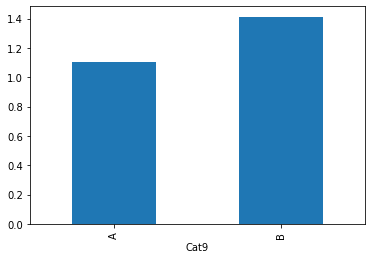

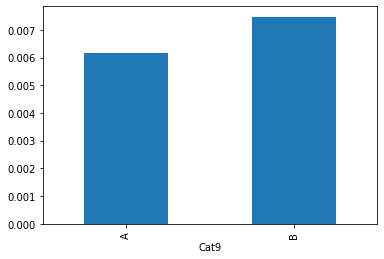

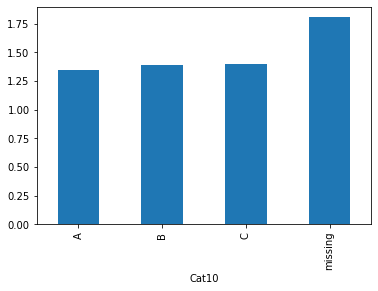

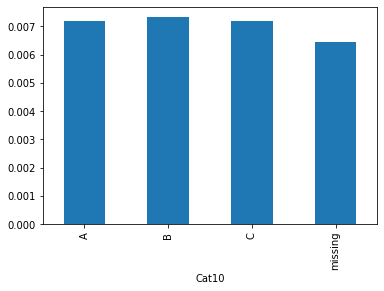

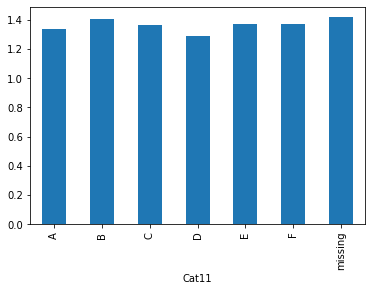

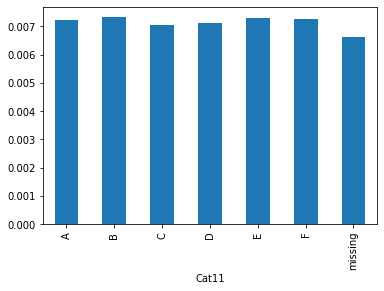

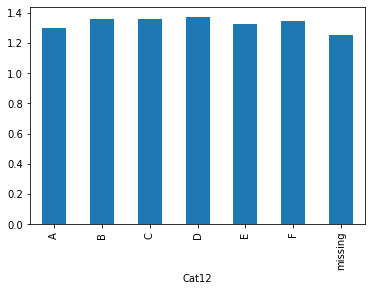

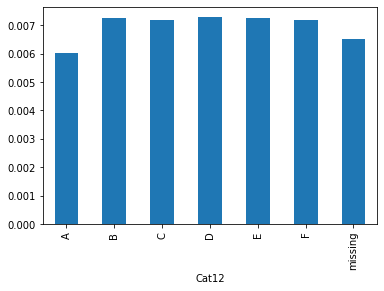

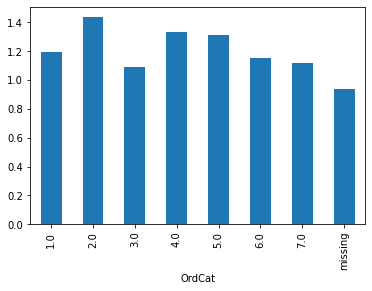

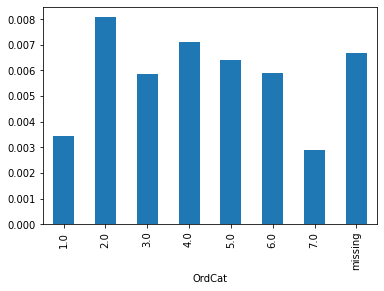

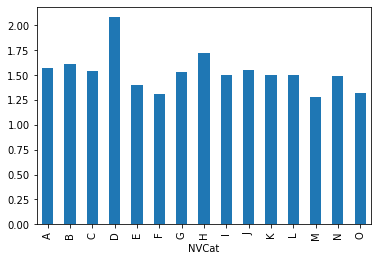

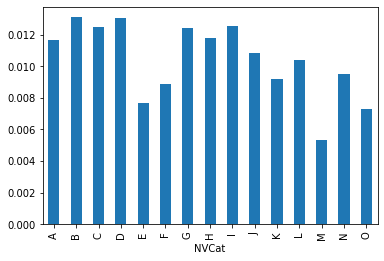

In [17]:
#Plot everything
for col in cols_categorical[3:]:
    #severity
    train_dat.groupby(col).mean()['Claim_Amount'].plot(kind = 'bar')
    plt.show()
    #frequency
    train_dat.groupby(col).mean()['Claim'].plot(kind = 'bar')
    plt.show()

In [18]:
# select predictors
preds_categorical = [e for e in cols_categorical if e not in ('Cat2', 'Cat4','OrdCat')]
print(preds_categorical)

['Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat3', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'NVCat']


In [19]:
# apply target engoding to make & model variables
for pred in preds_categorical[:3]:
    #print(train_dat.groupby(pred).mean()[['Claim_Amount','Claim']])
    target_map = train_dat.groupby(pred).mean()[['Claim_Amount','Claim']].to_dict()
    train_dat[pred + '_sev_tgt'] = train_dat.loc[:,pred].map(target_map['Claim_Amount'])
    train_dat[pred + '_frq_tgt'] = train_dat.loc[:,pred].map(target_map['Claim'])
    
train_dat.head()
    

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,NVVar4,Claim_Amount,Claim,FOLD,Blind_Make_sev_tgt,Blind_Make_frq_tgt,Blind_Model_sev_tgt,Blind_Model_frq_tgt,Blind_Submodel_sev_tgt,Blind_Submodel_frq_tgt
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,-0.251419,0.0,False,4,1.303908,0.007541,1.432849,0.007483,1.379030,0.007655
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,-0.251419,0.0,False,2,1.512835,0.007510,1.808350,0.007401,2.068871,0.008019
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,missing,...,-0.251419,0.0,False,1,1.254471,0.007413,1.548387,0.009688,1.443553,0.009844
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,missing,...,-0.251419,0.0,False,1,1.254471,0.007413,1.548387,0.009688,1.443553,0.009844
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,-0.251419,0.0,False,1,1.301812,0.006814,1.112148,0.006914,1.112148,0.006914


In [20]:
preds_categorical = [var for var in preds_categorical if 'Blind' not in var]
print(preds_categorical)

['Cat1', 'Cat3', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'NVCat']


In [21]:
train_dat.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount', 'Claim', 'FOLD', 'Blind_Make_sev_tgt',
       'Blind_Make_frq_tgt', 'Blind_Model_sev_tgt', 'Blind_Model_frq_tgt',
       'Blind_Submodel_sev_tgt', 'Blind_Submodel_frq_tgt'],
      dtype='object')

In [22]:
# Apply one-hot encoding -- these will enter model later

X_categorical = train_dat.loc[:,preds_categorical].copy()
X_categorical = pd.get_dummies(X_categorical, columns = preds_categorical)
X_categorical.head()

,Cat1_A,Cat1_B,Cat1_C,Cat1_D,Cat1_E,Cat1_F,Cat1_G,Cat1_H,Cat1_I,Cat1_J,...,NVCat_F,NVCat_G,NVCat_H,NVCat_I,NVCat_J,NVCat_K,NVCat_L,NVCat_M,NVCat_N,NVCat_O
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


### Numeric Vars

In [23]:
cols_numeric = [col for col in dat.columns if 'Var' in col]
print(cols_numeric)

['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4']


# TODO, some stuff here

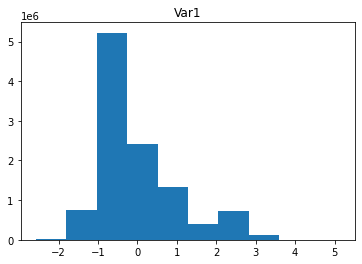

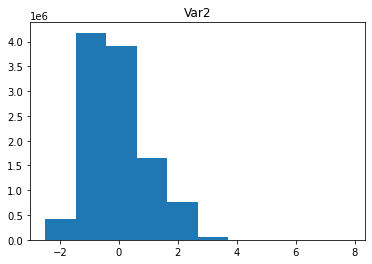

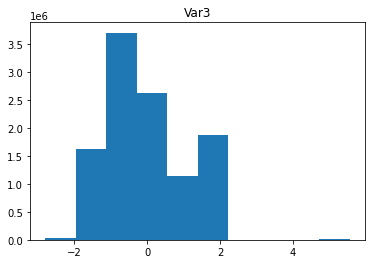

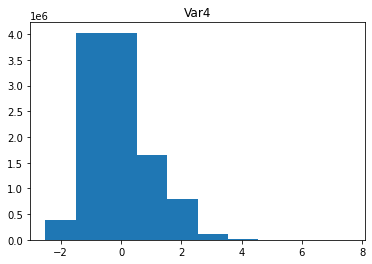

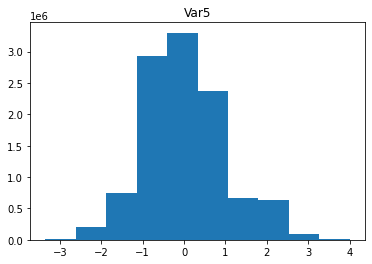

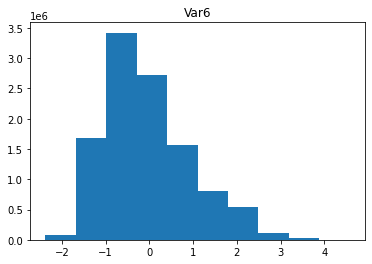

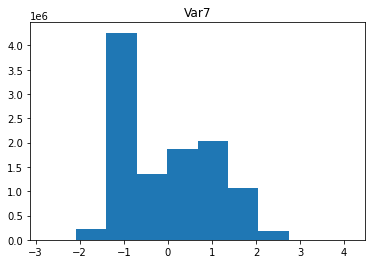

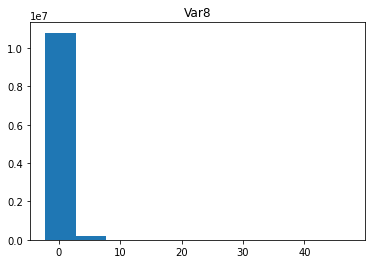

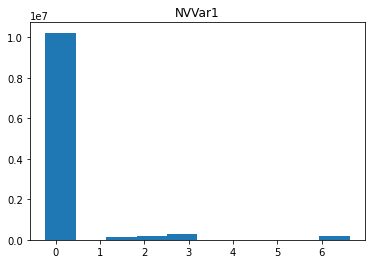

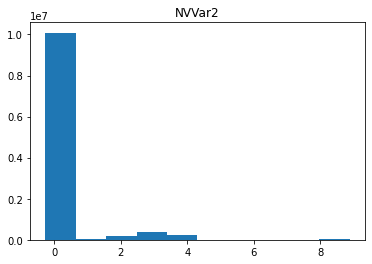

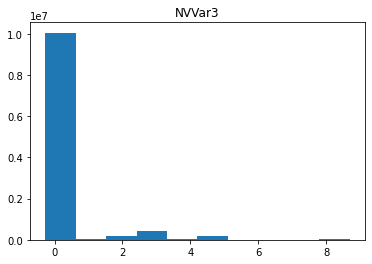

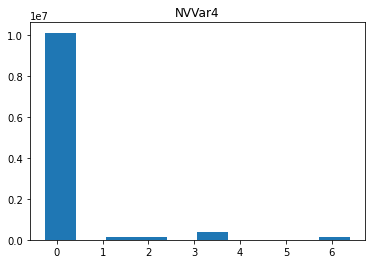

In [24]:
# plot univariate histograms - these are gross
# Var1 , Var2, Var3, Var6 - try log or square root
# Var2 - same
# Var3 - trim outliers
# Var7 has a lump over -1
# Var8, NVVar1, NVVar2, NVVar3, NVVar4 - drop, no info

for col in cols_numeric:
    plt.hist(train_dat[col])
    plt.title(col)
    plt.show()
    


In [25]:
cols_numeric = list(cols_numeric[:8])
print(cols_numeric)

['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8']


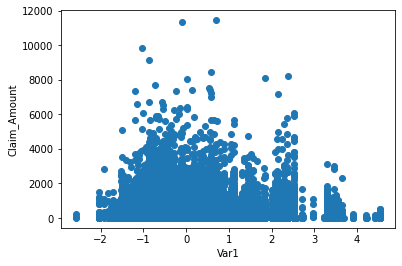

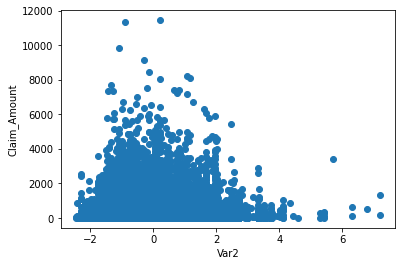

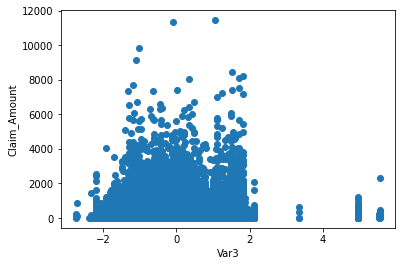

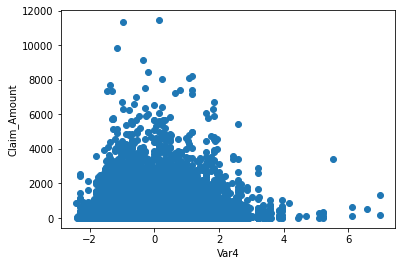

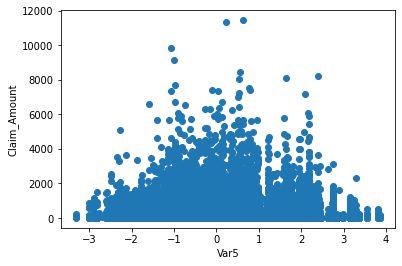

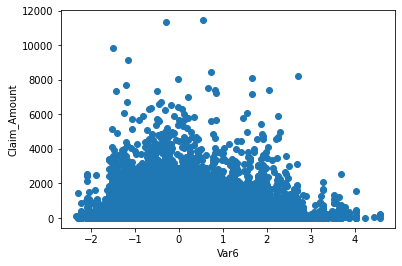

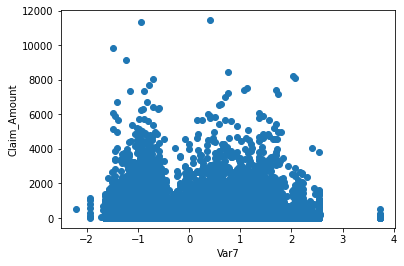

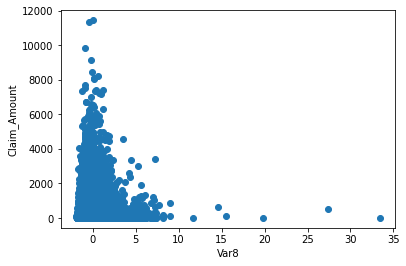

In [26]:
# plot everything nonzero
for col in cols_numeric:
    plt.scatter(train_dat.loc[train_dat['Claim'] == 1, col], train_dat.loc[train_dat['Claim'] == 1,'Claim_Amount'])
    plt.xlabel(col)
    plt.ylabel("Claim_Amount")
    plt.show()

In [27]:
# Actually I would recommend a lot of work binning these to force linear monotonicity
# BUT-- in the absence of time let's just add the quadratic terms and some interactions and see how we do!

for col in cols_numeric:
    train_dat[col + '_sqr'] = dat[col]**2

In [28]:
preds_numeric = cols_numeric + [col for col in train_dat.columns if 'sqr' in col ]
print(preds_numeric)

['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var1_sqr', 'Var2_sqr', 'Var3_sqr', 'Var4_sqr', 'Var5_sqr', 'Var6_sqr', 'Var7_sqr', 'Var8_sqr']


In [29]:
X_numeric = train_dat[preds_numeric]
X_numeric.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var1_sqr,Var2_sqr,Var3_sqr,Var4_sqr,Var5_sqr,Var6_sqr,Var7_sqr,Var8_sqr
0,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,1.614253,0.998837,0.345925,0.825102,1.017904,0.068142,0.824089,0.006084
1,0.217950,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,0.047502,0.321647,2.019825,0.235719,1.539710,0.187478,0.527743,0.041937
2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,0.568941,2.709733,1.212401,2.820535,0.943786,1.976266,0.700649,1.384994
3,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,0.568941,2.709733,1.212401,2.820535,0.943786,1.976266,0.700649,1.384994
4,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,0.317481,3.474404,3.292742,3.380467,0.660410,4.463463,2.354573,5.509632


## Logistic (Frequency) Model Fitting

In [30]:
y = train_dat[['Claim', 'FOLD']]
X = pd.concat([X_categorical, X_numeric, train_dat[['FOLD']]], axis = 1)

In [31]:
# Cross Validation

In [32]:
fold_aucs = []

for fold in pd.unique(train_dat['FOLD']):
    X_train = X[X['FOLD'] != fold].drop(['FOLD'], axis = 1)
    y_train = y[y['FOLD'] != fold].drop(['FOLD'], axis = 1)
    
    X_test = X[X['FOLD'] == fold].drop(['FOLD'], axis = 1)
    y_test = y[y['FOLD'] == fold].drop(['FOLD'], axis = 1)
    
    for alph in [0, 0.5, 1]:
        model = sm.Logit(y_train, X_train).fit_regularized(alpha = alph)
        preds = model.predict(X_test)
        
        fold_auc = roc_auc_score(y_test, preds)
        fold_aucs.append([[fold_auc]])
    

    
    

C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.042468517594821814
            Iterations: 325
            Function evaluations: 327
            Gradient evaluations: 325


C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.042470755692452566
            Iterations: 378
            Function evaluations: 381
            Gradient evaluations: 378


C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 80 out of 88 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.04247343247387823
            Iterations: 345
            Function evaluations: 347
            Gradient evaluations: 345


C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 68 out of 88 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\virtualenvs\AutoClaims\lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


MemoryError: Unable to allocate 5.83 GiB for an array with shape (8787333, 89) and data type float64

In [33]:
print(fold_aucs)

[[[0.5940666692584242]], [[0.5941306464987566]], [[0.5941374877491288]]]
